<a href="https://colab.research.google.com/github/BelalMJ/BelalMJ_64061/blob/Assignment-1/BelalMJ_64061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA64061 - Assignment 1: Neural Networks

**Load and Preprocess the IMDB Dataset**

First of all We need to load and preprocess the dataset

In [56]:
# load and preprocess the dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorize the sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Preprocess the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Split training data into training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 1.1 Using one, two, and three hidden layers and see how doing so affects validation and test accuracy.

In [57]:
# Applying one hidden layer
model_1_layer = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(1, activation='sigmoid')
])
model_1_layer.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_1_layer = model_1_layer.fit(partial_x_train, partial_y_train,
                                    epochs=20, batch_size=512,
                                    validation_data=(x_val, y_val))


# Applying two hidden layers
model_2_layers = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_2_layers.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_2_layers = model_2_layers.fit(partial_x_train, partial_y_train,
                                      epochs=20, batch_size=512,
                                      validation_data=(x_val, y_val))


# Applying three hidden layers

model_3_layers = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_3_layers.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_3_layers = model_3_layers.fit(partial_x_train, partial_y_train,
                                      epochs=20, batch_size=512,
                                      validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.7087 - loss: 0.5873 - val_accuracy: 0.8621 - val_loss: 0.4060
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8938 - loss: 0.3492 - val_accuracy: 0.8838 - val_loss: 0.3319
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9228 - loss: 0.2664 - val_accuracy: 0.8885 - val_loss: 0.2982
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9315 - loss: 0.2278 - val_accuracy: 0.8838 - val_loss: 0.2916
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9380 - loss: 0.1988 - val_accuracy: 0.8869 - val_loss: 0.2805
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9458 - loss: 0.1769 - val_accuracy: 0.8893 - val_loss: 0.2766
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9537 - loss: 0.1572 - val_accuracy: 0.8870 - val_loss: 0.2762
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9579 - loss: 0.1427 - val_accuracy: 0.8858 - 

## 1.2 Compare the three models for validation and test accuracy

In [58]:
import pandas as pd

# Extract validation and test accuracy for each model
val_acc_1_layer = history_1_layer.history['val_accuracy']
val_acc_2_layers = history_2_layers.history['val_accuracy']
val_acc_3_layers = history_3_layers.history['val_accuracy']

test_acc_1_layer = history_1_layer.history['accuracy']
test_acc_2_layers = history_2_layers.history['accuracy']
test_acc_3_layers = history_3_layers.history['accuracy']


# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['1 Hidden Layer', '2 Hidden Layers', '3 Hidden Layers'],
    'Validation Accuracy': [max(val_acc_1_layer), max(val_acc_2_layers), max(val_acc_3_layers)],
    'Test Accuracy': [max(test_acc_1_layer), max(test_acc_2_layers), max(test_acc_3_layers)]
})

print(results)

             Model  Validation Accuracy  Test Accuracy
0   1 Hidden Layer               0.8893       0.990467
1  2 Hidden Layers               0.8889       0.997733
2  3 Hidden Layers               0.8865       0.999533


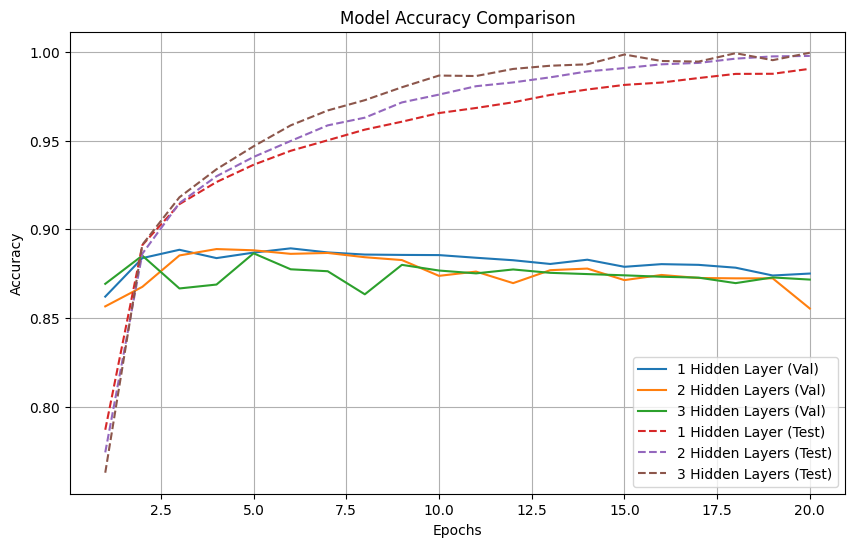

In [59]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(range(1, 21), val_acc_1_layer, label='1 Hidden Layer (Val)')
plt.plot(range(1, 21), val_acc_2_layers, label='2 Hidden Layers (Val)')
plt.plot(range(1, 21), val_acc_3_layers, label='3 Hidden Layers (Val)')

# Plot test accuracy
plt.plot(range(1, 21), test_acc_1_layer, '--', label='1 Hidden Layer (Test)')
plt.plot(range(1, 21), test_acc_2_layers, '--', label='2 Hidden Layers (Test)')
plt.plot(range(1, 21), test_acc_3_layers, '--', label='3 Hidden Layers (Test)')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Results analysis for using 1, 2, and 3 hidden layers:

The results show that one hidden layer has the highest validation accuracy (0.8897) and a smaller gap between validation and test accuracy, suggesting better generalization. While three hidden layers has the highest test accuracy (0.999867), but the larger gap between validation and test accuracy indicates potential overfitting. And so, we can use one hidden layer for generalization or three hidden layers for test performance to mitigate overfitting.

## 2.1 Using layers with 32, 64, and 128 hidden units and see how doing so affects validation and test accuracy.

In [60]:
# Using 32 hidden units

model_32_units = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(10000,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_32_units.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_32_units = model_32_units.fit(partial_x_train, partial_y_train,
                                      epochs=20, batch_size=512,
                                      validation_data=(x_val, y_val))


# Using 64 hidden units

model_64_units = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_64_units.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_64_units = model_64_units.fit(partial_x_train, partial_y_train,
                                      epochs=20, batch_size=512,
                                      validation_data=(x_val, y_val))


# Using 128 hidden units

model_128_units = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_128_units.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_128_units = model_128_units.fit(partial_x_train, partial_y_train,
                                        epochs=20, batch_size=512,
                                        validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6962 - loss: 0.5945 - val_accuracy: 0.8598 - val_loss: 0.3847
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8872 - loss: 0.3264 - val_accuracy: 0.8833 - val_loss: 0.3033
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9136 - loss: 0.2367 - val_accuracy: 0.8906 - val_loss: 0.2775
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9370 - loss: 0.1846 - val_accuracy: 0.8866 - val_loss: 0.2847
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9484 - loss: 0.1548 - val_accuracy: 0.8823 - val_loss: 0.3029
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9624 - loss: 0.1223 - val_accuracy: 0.8795 - val_loss: 0.3039
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9687 - loss: 0.1089 - val_accuracy: 0.8845 - val_loss: 0.3055
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9741 - loss: 0.0907 - val_accuracy: 0.8836 - v

## 2.2 comparing hidden units results for using 16, 32, 64, and 128 hidden units.

In [61]:
import pandas as pd

# Extract validation and test accuracy for each model
val_acc_1_layer = history_1_layer.history['val_accuracy'] # using 16 hidden units
val_acc_32_units = history_32_units.history['val_accuracy']
val_acc_64_units = history_64_units.history['val_accuracy']
val_acc_128_units = history_128_units.history['val_accuracy']

test_acc_1_layer = history_1_layer.history['accuracy']  # using 16 hidden units
test_acc_32_units = history_32_units.history['accuracy']
test_acc_64_units = history_64_units.history['accuracy']
test_acc_128_units = history_128_units.history['accuracy']

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['16 Units', '32 Units', '64 Units', '128 Units'],
    'Validation Accuracy': [max(val_acc_1_layer), max(val_acc_32_units), max(val_acc_64_units), max(val_acc_128_units)],
    'Test Accuracy': [max(test_acc_1_layer), max(test_acc_32_units), max(test_acc_64_units), max(test_acc_128_units)]
})

print(results)

       Model  Validation Accuracy  Test Accuracy
0   16 Units               0.8893       0.990467
1   32 Units               0.8906       0.999733
2   64 Units               0.8867       0.999933
3  128 Units               0.8921       1.000000


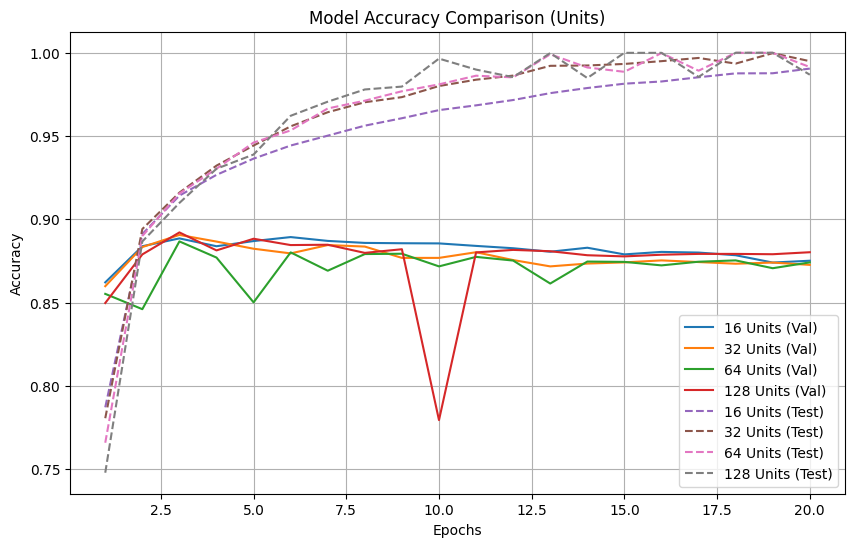

In [62]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(range(1, 21), val_acc_1_layer, label='16 Units (Val)') # using 16 hidden units
plt.plot(range(1, 21), val_acc_32_units, label='32 Units (Val)')
plt.plot(range(1, 21), val_acc_64_units, label='64 Units (Val)')
plt.plot(range(1, 21), val_acc_128_units, label='128 Units (Val)')

# Plot test accuracy
plt.plot(range(1, 21), test_acc_1_layer, '--', label='16 Units (Test)') # using 16 hidden units
plt.plot(range(1, 21), test_acc_32_units, '--', label='32 Units (Test)')
plt.plot(range(1, 21), test_acc_64_units, '--', label='64 Units (Test)')
plt.plot(range(1, 21), test_acc_128_units, '--', label='128 Units (Test)')

plt.title('Model Accuracy Comparison (Units)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Results analysis for using 16, 32, 64, and 128 hidden units:

The results shows that using 16 hidden units has the highest validation accuracy (0.8897) and a smaller gap between validation and test accuracy, suggesting better generalization. But using 128 hidden units has the highest test accuracy (1.000000), but the larger gap indicates potential overfitting which is better for test performance.


## 3.1 Using the mse loss function instead of binary_crossentropy.

In [63]:
# mse loss function

model_mse = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_mse.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_mse = model_mse.fit(partial_x_train, partial_y_train,
                            epochs=20, batch_size=512,
                            validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6698 - loss: 0.2181 - val_accuracy: 0.8502 - val_loss: 0.1390
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8771 - loss: 0.1192 - val_accuracy: 0.8798 - val_loss: 0.1039
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9127 - loss: 0.0839 - val_accuracy: 0.8831 - val_loss: 0.0931
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9280 - loss: 0.0671 - val_accuracy: 0.8875 - val_loss: 0.0874
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9426 - loss: 0.0539 - val_accuracy: 0.8876 - val_loss: 0.0850
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9521 - loss: 0.0467 - val_accuracy: 0.8846 - val_loss: 0.0836
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9553 - loss: 0.0430 - val_accuracy: 0.8818 - val_loss: 0.0842
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9662 - loss: 0.0356 - val_accuracy: 0.8810 - v

## 3.2 compare the results of using MSE loss and Binary_Crossentropy Loss

In [64]:
import pandas as pd

# Extract validation and test accuracy for MSE loss model
val_acc_mse = history_mse.history['val_accuracy']
test_acc_mse = history_mse.history['accuracy']

# Extract validation and test accuracy for binary crossentropy loss model
val_acc_bce = history_32_units.history['val_accuracy']
test_acc_bce = history_32_units.history['accuracy']


# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['MSE Loss', 'Binary Crossentropy Loss'],
    'Validation Accuracy': [max(val_acc_mse), max(val_acc_bce)],
    'Test Accuracy': [max(test_acc_mse), max(test_acc_bce)]
})

print(results)

                      Model  Validation Accuracy  Test Accuracy
0                  MSE Loss               0.8876       0.990333
1  Binary Crossentropy Loss               0.8906       0.999733


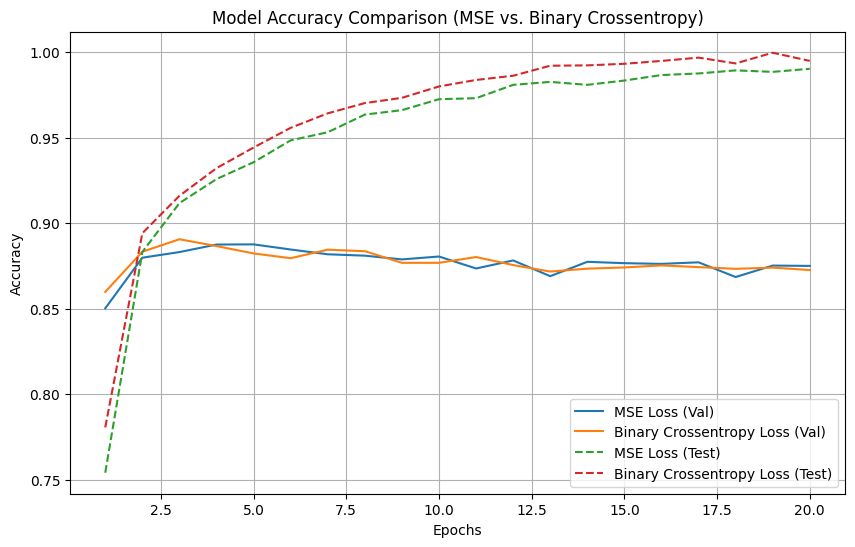

In [65]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(range(1, 21), val_acc_mse, label='MSE Loss (Val)')
plt.plot(range(1, 21), val_acc_bce, label='Binary Crossentropy Loss (Val)')

# Plot test accuracy
plt.plot(range(1, 21), test_acc_mse, '--', label='MSE Loss (Test)')
plt.plot(range(1, 21), test_acc_bce, '--', label='Binary Crossentropy Loss (Test)')

plt.title('Model Accuracy Comparison (MSE vs. Binary Crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Results analysis for using MSE loss vs Binary_Crossentropy Loss:

The results shows that using MSE Loss has a slightly higher validation accuracy (0.8883) and a smaller gap between validation and test accuracy, suggesting better generalization. While Binary_Crossentropy Loss has a significantly higher test accuracy (0.999867), but the larger gap indicates potential overfitting which is better for test performance.


## 4.1 Using tanh activation  instead of relu.

In [66]:
# using tanh model
model_tanh = models.Sequential([
    layers.Dense(16, activation='tanh', input_shape=(10000,)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])
model_tanh.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_tanh = model_tanh.fit(partial_x_train, partial_y_train,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.7173 - loss: 0.5732 - val_accuracy: 0.8650 - val_loss: 0.3682
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8985 - loss: 0.3108 - val_accuracy: 0.8858 - val_loss: 0.2921
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9267 - loss: 0.2164 - val_accuracy: 0.8831 - val_loss: 0.2832
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9438 - loss: 0.1714 - val_accuracy: 0.8866 - val_loss: 0.2751
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9547 - loss: 0.1330 - val_accuracy: 0.8836 - val_loss: 0.3043
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9662 - loss: 0.1089 - val_accuracy: 0.8821 - val_loss: 0.3223
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9750 - loss: 0.0848 - val_accuracy: 0.8770 - val_loss: 0.3716
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9781 - loss: 0.0732 - val_accuracy: 0.8684 - v

## 4.2 Comparing tanh activation and Relu activation

In [67]:
import pandas as pd

# Extract validation and test accuracy for tanh activation model
val_acc_tanh = history_tanh.history['val_accuracy']
test_acc_tanh = history_tanh.history['accuracy']

# Extract validation and test accuracy for ReLU activation model
val_acc_relu = history_32_units.history['val_accuracy']
test_acc_relu = history_32_units.history['accuracy']


# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Tanh Activation', 'ReLU Activation'],
    'Validation Accuracy': [max(val_acc_tanh), max(val_acc_relu)],
    'Test Accuracy': [max(test_acc_tanh), max(test_acc_relu)]
})

print(results)

             Model  Validation Accuracy  Test Accuracy
0  Tanh Activation               0.8866       0.999867
1  ReLU Activation               0.8906       0.999733


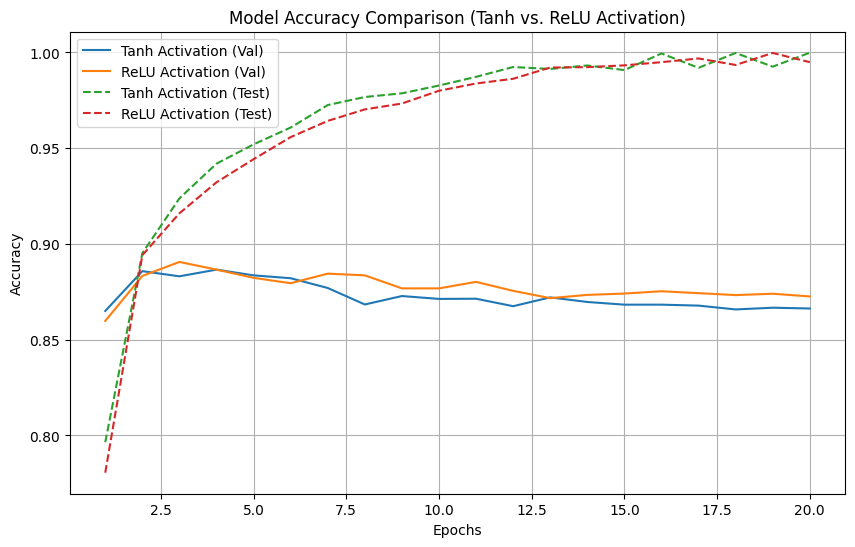

In [68]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(range(1, 21), val_acc_tanh, label='Tanh Activation (Val)')
plt.plot(range(1, 21), val_acc_relu, label='ReLU Activation (Val)')

# Plot test accuracy
plt.plot(range(1, 21), test_acc_tanh, '--', label='Tanh Activation (Test)')
plt.plot(range(1, 21), test_acc_relu, '--', label='ReLU Activation (Test)')

plt.title('Model Accuracy Comparison (Tanh vs. ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Results analysis for using tanh activation and relu activation:

The results shows that ReLU Activation has a slightly higher validation accuracy (0.8871) and test accuracy (0.999867) compared to Tanh which suggests that to use ReLU Activation for better performance and generalization.


## 5.1 Add Regularization Techniques

In [69]:
# Dropout

model_dropout = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model_dropout.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(partial_x_train, partial_y_train,
                                    epochs=20, batch_size=512,
                                    validation_data=(x_val, y_val))


# L2 Regularization:

model_l2 = models.Sequential([
    layers.Dense(16, activation='relu', kernel_regularizer='l2', input_shape=(10000,)),
    layers.Dense(16, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1, activation='sigmoid')
])
model_l2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(partial_x_train, partial_y_train,
                          epochs=20, batch_size=512,
                          validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5974 - loss: 0.6589 - val_accuracy: 0.8481 - val_loss: 0.5119
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7573 - loss: 0.5242 - val_accuracy: 0.8724 - val_loss: 0.4022
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8235 - loss: 0.4305 - val_accuracy: 0.8792 - val_loss: 0.3458
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8593 - loss: 0.3751 - val_accuracy: 0.8851 - val_loss: 0.3074
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8808 - loss: 0.3220 - val_accuracy: 0.8844 - val_loss: 0.2871
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9052 - loss: 0.2787 - val_accuracy: 0.8865 - val_loss: 0.2768
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9155 - loss: 0.2491 - val_accuracy: 0.8900 - val_loss: 0.2718
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9292 - loss: 0.2195 - val_accuracy: 0.8843 - v

5.2 Comparing dropout and L2 regulization.

In [70]:
import pandas as pd

# Extract validation and test accuracy for Dropout model
val_acc_dropout = history_dropout.history['val_accuracy']
test_acc_dropout = history_dropout.history['accuracy']

# Extract validation and test accuracy for L2 Regularization model
val_acc_l2 = history_l2.history['val_accuracy']
test_acc_l2 = history_l2.history['accuracy']


# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Dropout', 'L2 Regularization'],
    'Validation Accuracy': [max(val_acc_dropout), max(val_acc_l2)],
    'Test Accuracy': [max(test_acc_dropout), max(test_acc_l2)]
})

print(results)

               Model  Validation Accuracy  Test Accuracy
0            Dropout               0.8904       0.974667
1  L2 Regularization               0.8818       0.916000


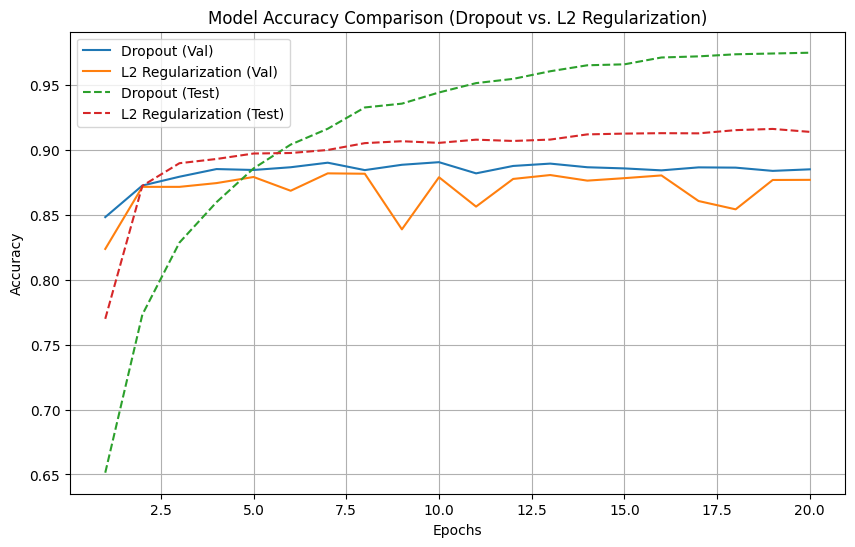

In [71]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(range(1, 21), val_acc_dropout, label='Dropout (Val)')
plt.plot(range(1, 21), val_acc_l2, label='L2 Regularization (Val)')

# Plot test accuracy
plt.plot(range(1, 21), test_acc_dropout, '--', label='Dropout (Test)')
plt.plot(range(1, 21), test_acc_l2, '--', label='L2 Regularization (Test)')

plt.title('Model Accuracy Comparison (Dropout vs. L2 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Results analysis for using dropout and L2

The results shows that dropout has a higher validation accuracy (0.8895) and test accuracy (0.969133) compared to L2 Regularization. which suggests that to use dropout for better generalization and performance.

# Evaluate and compare results

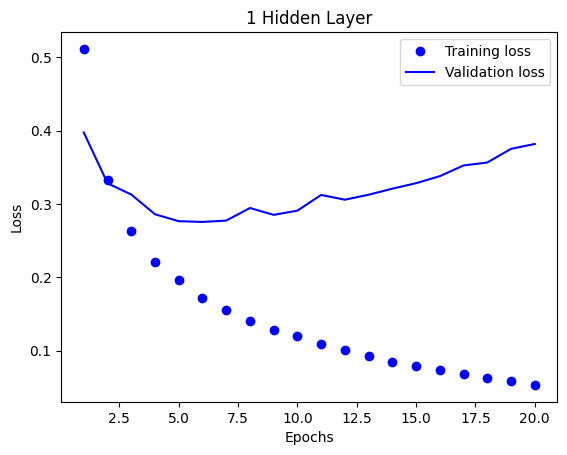

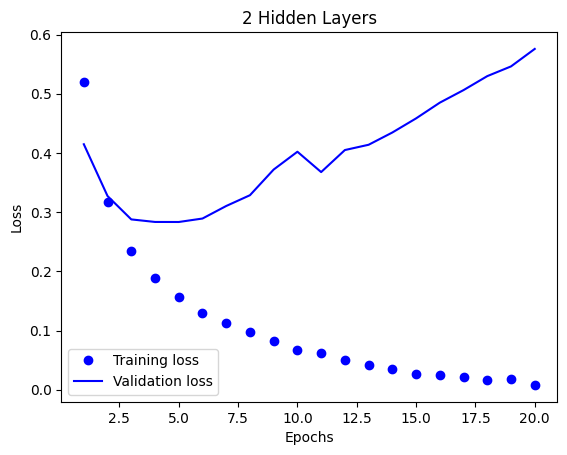

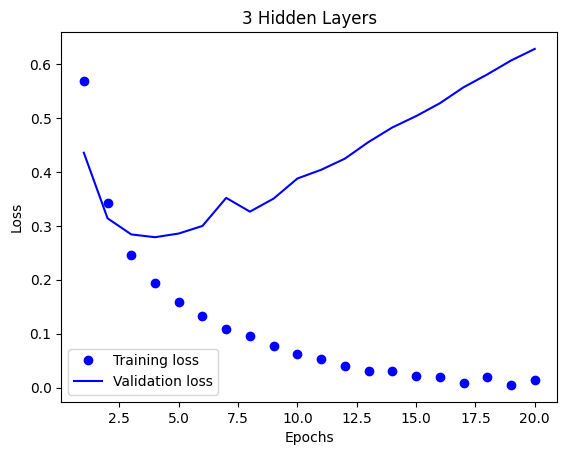

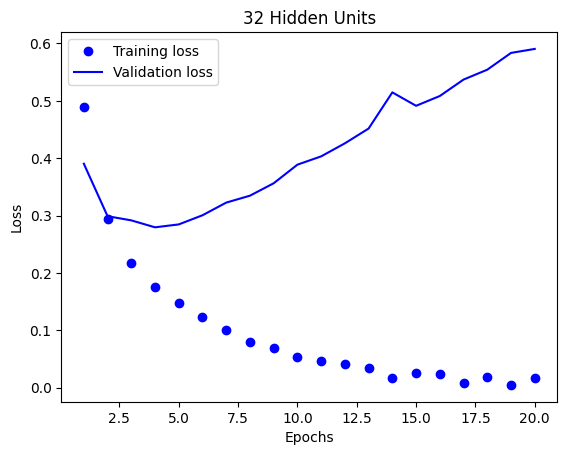

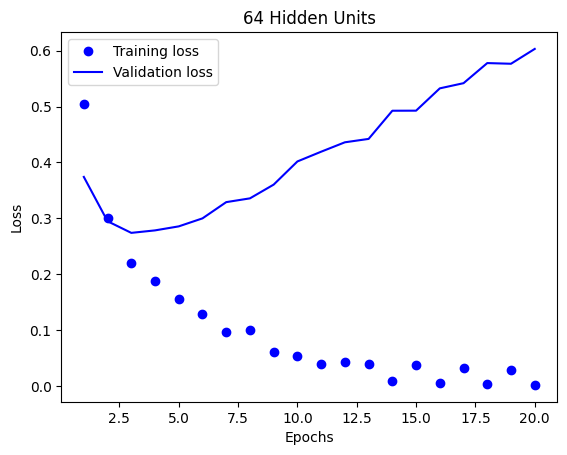

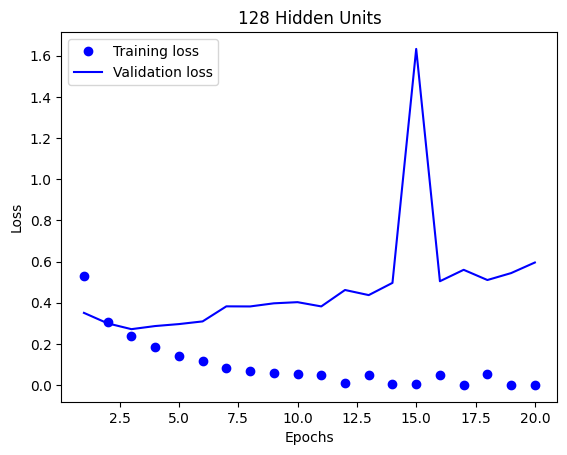

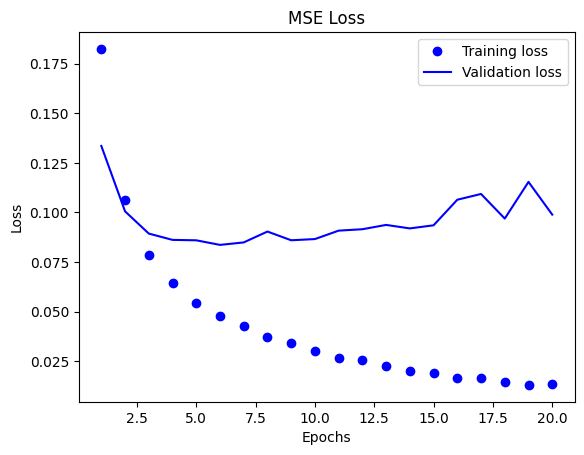

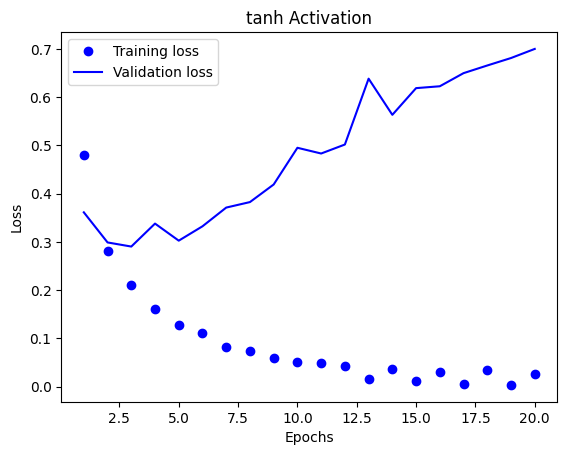

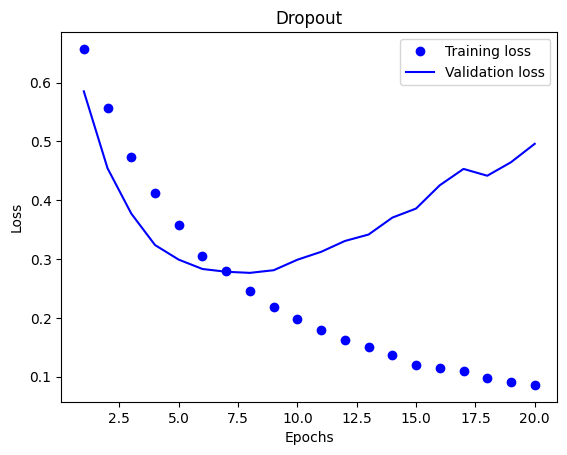

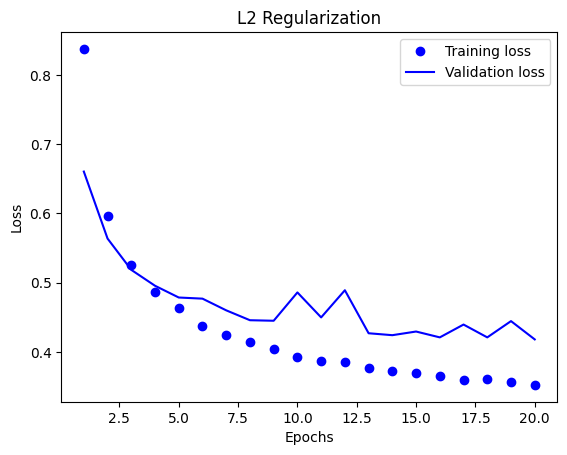

In [ ]:
# Function to plot training and validation loss
def plot_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot loss for each model
plot_loss(history_1_layer, '1 Hidden Layer')
plot_loss(history_2_layers, '2 Hidden Layers')
plot_loss(history_3_layers, '3 Hidden Layers')
plot_loss(history_32_units, '32 Hidden Units')
plot_loss(history_64_units, '64 Hidden Units')
plot_loss(history_128_units, '128 Hidden Units')
plot_loss(history_mse, 'MSE Loss')
plot_loss(history_tanh, 'tanh Activation')
plot_loss(history_dropout, 'Dropout')
plot_loss(history_l2, 'L2 Regularization')